In [1]:
import pandas as pd

In [2]:
#!pip install nsepy

In [3]:
#pip install scikit-learn==1.0.0

In [4]:
#pip install statsmodels==0.12.2

In [5]:
from nsepy import get_history as gh
import datetime as dt

In [6]:
#!pip install yfinance

In [7]:
import yfinance as yf

In [8]:
import datetime as dt

start = dt.datetime(2021, 7, 1)
end = dt.datetime(2022, 1, 27)
symbol = 'AXISBANK.NS'  # Stock symbol in uppercase

stk_data = yf.download(symbol, start=start, end=end)

[*********************100%%**********************]  1 of 1 completed


In [9]:
stk_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-07-01,750.000000,754.400024,744.500000,746.450012,744.555725,5695690
2021-07-02,747.599976,752.849976,744.000000,750.650024,748.745117,3557647
2021-07-05,757.099976,762.000000,753.400024,760.349976,758.420471,4680089
2021-07-06,757.000000,767.000000,755.200012,758.349976,756.425476,5529485
2021-07-07,755.900024,764.000000,752.250000,762.900024,760.963989,3573368
...,...,...,...,...,...,...
2022-01-19,725.200012,731.950012,718.700012,729.599976,727.748413,7746270
2022-01-20,731.049988,737.150024,722.150024,728.900024,727.050293,8505400
2022-01-21,722.000000,725.250000,708.049988,712.500000,710.691895,10689060


In [10]:
#start = dt.datetime(2021,7,1)
#end = dt.datetime(2022,1,27)
#stk_data = gh(symbol='NIFTY',start=start,end=end)

In [11]:
stk_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-07-01,750.000000,754.400024,744.500000,746.450012,744.555725,5695690
2021-07-02,747.599976,752.849976,744.000000,750.650024,748.745117,3557647
2021-07-05,757.099976,762.000000,753.400024,760.349976,758.420471,4680089
2021-07-06,757.000000,767.000000,755.200012,758.349976,756.425476,5529485
2021-07-07,755.900024,764.000000,752.250000,762.900024,760.963989,3573368
...,...,...,...,...,...,...
2022-01-19,725.200012,731.950012,718.700012,729.599976,727.748413,7746270
2022-01-20,731.049988,737.150024,722.150024,728.900024,727.050293,8505400
2022-01-21,722.000000,725.250000,708.049988,712.500000,710.691895,10689060


In [12]:
stk_data=stk_data[["Open","High","Low","Close"]]


In [13]:
stk_data

,Open,High,Low,Close
Date,,,,
2021-07-01,750.000000,754.400024,744.500000,746.450012
2021-07-02,747.599976,752.849976,744.000000,750.650024
2021-07-05,757.099976,762.000000,753.400024,760.349976
2021-07-06,757.000000,767.000000,755.200012,758.349976
2021-07-07,755.900024,764.000000,752.250000,762.900024
...,...,...,...,...
2022-01-19,725.200012,731.950012,718.700012,729.599976
2022-01-20,731.049988,737.150024,722.150024,728.900024
2022-01-21,722.000000,725.250000,708.049988,712.500000


In [14]:
column="Close"

In [15]:
from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()
data1= Ms.fit_transform(stk_data[[column]])
print("Len:",data1.shape)

Len: (143, 1)


In [16]:
len(data1)

143

In [17]:
training_size = round(len(data1 ) * 0.95)
print(training_size)
X_train=data1[:training_size]
X_test=data1[training_size:]
print("X_train length:",X_train.shape)
print("X_test length:",X_test.shape)
y_train=data1[:training_size]
y_test=data1[training_size:]
print("y_train length:",y_train.shape)
print("y_test length:",y_test.shape)

136
X_train length: (136, 1)
X_test length: (7, 1)
y_train length: (136, 1)
y_test length: (7, 1)


In [18]:
import warnings
warnings.filterwarnings("ignore")

In [40]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
orders=[(1,1,1,12),(2,1,1,10),(3,3,11),(3,2,10)]
for i in orders:
    model = SARIMAX(data1, order=i, seasonal_order=(1, 1, 1, 12))  # Example seasonal_order, adjust as needed
    model_fit = model.fit()
    y_pred = model_fit.predict(0,len(data1) - 1)
    from stockFunctions import rmsemape
    rmsemape(data1, y_pred)
    print("************")


ValueError: `order` argument must be an iterable with three elements.

In [20]:
len(y_pred)

143

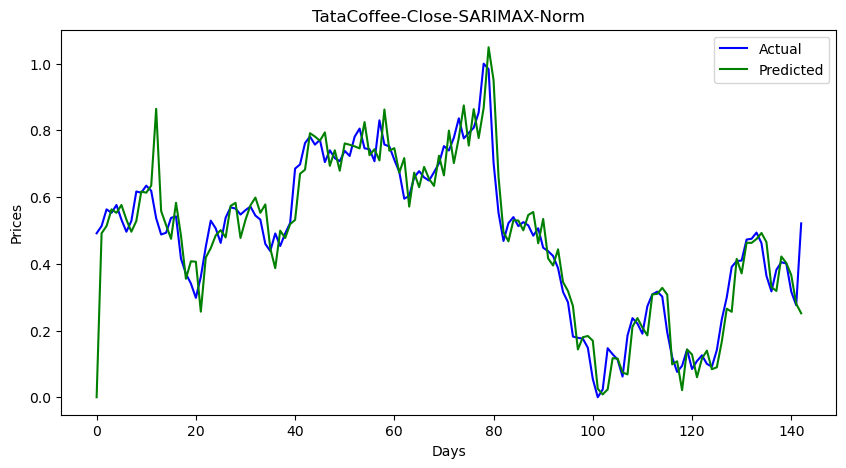

In [21]:
from stockFunctions import graph
graph(data1,y_pred,"Actual","Predicted","TataCoffee-Close-SARIMAX-Norm","Days","Prices")

In [22]:
len(data1)

143

In [23]:
y_test

array([[0.31726829],
       [0.38195895],
       [0.40463918],
       [0.40103118],
       [0.31649497],
       [0.2757732 ],
       [0.52113421]])

In [24]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(y_test,[column])

In [25]:
aTestNormTable

,Close
0,0.317268
1,0.381959
2,0.404639
3,0.401031
4,0.316495
5,0.275773
6,0.521134


In [26]:
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)

In [27]:
actual_stock_price_test_ori

array([[712.65002441],
       [725.20001221],
       [729.59997559],
       [728.90002441],
       [712.5       ],
       [704.59997559],
       [752.20001221]])

In [28]:
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,[column])

In [29]:
actual_stock_price_test_oriA

,Close
0,712.650024
1,725.200012
2,729.599976
3,728.900024
4,712.5
5,704.599976
6,752.200012


In [30]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(y_test,[column])
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,[column])

In [31]:
from stockFunctions import conversionSingle
pTestNormTable=conversionSingle(y_pred,[column])
predicted_stock_price_test_ori=Ms.inverse_transform(pTestNormTable)
predicted_stock_price_test_oriP=conversionSingle(predicted_stock_price_test_ori,[column])

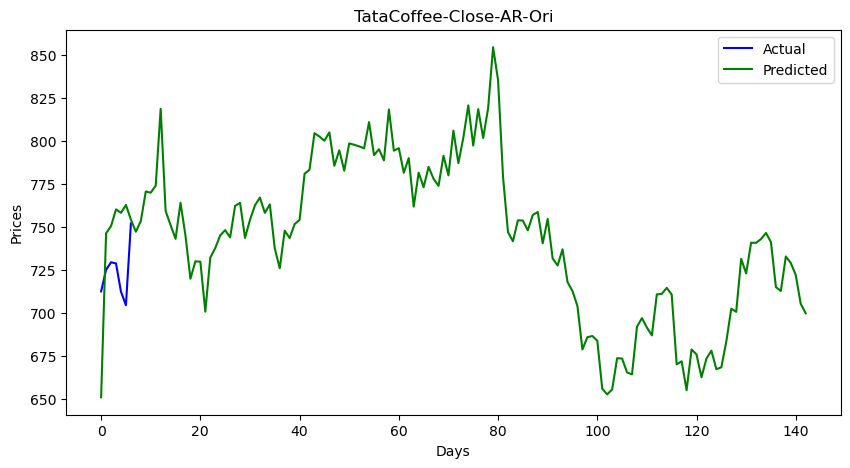

In [32]:
from stockFunctions import graph
graph(actual_stock_price_test_oriA,predicted_stock_price_test_oriP,"Actual","Predicted","TataCoffee-Close-AR-Ori","Days","Prices")

In [33]:
forecast=model_fit.predict(len(data1), len(data1)+3)

In [34]:
forecast

array([0.65977801, 0.64364376, 0.64592718, 0.63726405])

In [35]:
from stockFunctions import conversionSingle
fTestNormTable=conversionSingle(forecast,["Closefore"])
forecast_stock_price_test_ori=Ms.inverse_transform(fTestNormTable)
forecast_stock_price_test_oriF=conversionSingle(forecast_stock_price_test_ori,["Closefore"])

In [36]:
forecast_stock_price_test_oriF

,Closefore
0,779.09691
1,775.966865
2,776.409849
3,774.729202


In [37]:
forecast_stock_price_test_oriF.to_csv("CloseSARIMAX.csv",index=False)

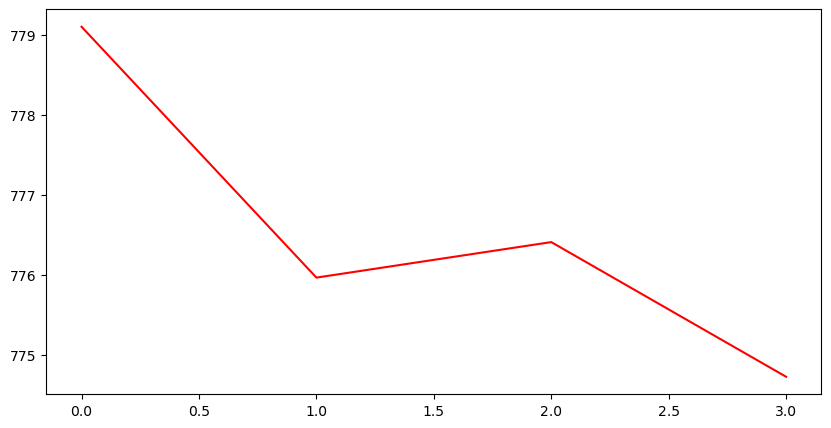

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(actual_stock_price_test_oriA[116:145], color = 'blue', label="Actual")
plt.plot(forecast_stock_price_test_oriF, color = 'red', label ="Predicted")

In [39]:
forecast_stock_price_test_oriF

,Closefore
0,779.09691
1,775.966865
2,776.409849
3,774.729202
